## MLG Escarabajos muertos
#### Oscar Julian Layton
Datos de un estudio que examina la respuesta de escarabajos de harina confundidos a concentraciones crecientes de disulfuro de carbono gaseoso. Después de la exposición durante cinco horas, se determinó la concentración exacta de disulfuro de carbono y se registró el número de escarabajos de harina muertos. Para cada concentración de disulfuro de carbono se utilizaron lotes duplicados de escarabajos.

* **Dosis**: concentración de disulfuro de carbono.
* **Died**:  Número de escarabajos muertos.
* **n**: Número de escarabajos expuestos.
* $y_k =\frac{Died}{n}$: Proporción de escarabajos muertos en el k-esimo grupo.

La respuesta puede ser analizada por medio de una **binomial** puesto que al ser el número de escarabajos muertos son realizaciones de binomiales, esto es 8 binomiales además el número de ensayos varian en cada k y la probabilidad de exito $\mu$ depende de la cantidad de quimico que se les asigno. No obstante se considera que:

* $m_k Y_k \sim Binomial(m_k, \mu_k)$
* $m_k$ Número de escarabajos expuestos en el k-esimo grupo.
* $\mu_k$ : El número de ensayos. es igual a 1
* $\mu_k$ : La probabilidad de que un escarabajo muera dado que fue expuesto a la k-esima dosis.
* las variables aleatorias son indipendientes.
* En el ejemplo de los escarabajos satelites, $m_k=1$ porque $y_k$ es bernoulli pues es dicotomica la rta

In [3]:
require(glmx)
data(BeetleMortality)
beetles<-BeetleMortality;beetles

Loading required package: glmx


dose,died,n
1.6907,6,59
1.7242,13,60
1.7552,18,62
1.7842,28,56
1.8113,52,63
1.8369,53,59
1.8610,61,62
1.8839,60,60


A continuación se presenta los modelos dependiendo de la función de enclace:

### Función de enlace logit

In [4]:
fit1<-glm(died/n ~ dose, weights=n, data=beetles, family=binomial("logit"))  # pesos:m_k= weights = n   
#si no se especifica ("logit") la función usa por defecto la función de enlace canonica, esto es la logit
#Al omitir weights que son los pesos m_k por default pone 1, en el caso de bernoullly o po
summary(fit1)


Call:
glm(formula = died/n ~ dose, family = binomial("logit"), data = beetles, 
    weights = n)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5941  -0.3944   0.8329   1.2592   1.5940  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -60.717      5.181  -11.72   <2e-16 ***
dose          34.270      2.912   11.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.202  on 7  degrees of freedom
Residual deviance:  11.232  on 6  degrees of freedom
AIC: 41.43

Number of Fisher Scoring iterations: 4


### Función de enlace probit

In [5]:
fit2<-glm(died/n ~ dose, weights=n, data=beetles, family=binomial("probit"))
summary(fit2)


Call:
glm(formula = died/n ~ dose, family = binomial("probit"), data = beetles, 
    weights = n)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5714  -0.4703   0.7501   1.0632   1.3449  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -34.935      2.648  -13.19   <2e-16 ***
dose          19.728      1.487   13.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.20  on 7  degrees of freedom
Residual deviance:  10.12  on 6  degrees of freedom
AIC: 40.318

Number of Fisher Scoring iterations: 4


### Función de enlace cloglog

In [6]:
fit3<-glm(died/n ~ dose, weights=n, data=beetles, family=binomial("cloglog"))
summary(fit3)
attributes(fit3)


Call:
glm(formula = died/n ~ dose, family = binomial("cloglog"), data = beetles, 
    weights = n)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.80329  -0.55135   0.03089   0.38315   1.28883  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -39.572      3.240  -12.21   <2e-16 ***
dose          22.041      1.799   12.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.2024  on 7  degrees of freedom
Residual deviance:   3.4464  on 6  degrees of freedom
AIC: 33.644

Number of Fisher Scoring iterations: 4


$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

Antes de todo, se realiza el AIC o BIC para de esta manera poder determinar el mejor modelo que se ajusta a los datos, en este orden de ideas, se genera estos criterios de información para poder establecer interpretaciones.

In [7]:
AIC(fit1,fit2,fit3)  
BIC(fit1,fit2,fit3)   #Da lo mismo porque tienen la misma cantidad de parámetros

,df,AIC
fit1,2,41.43027
fit2,2,40.31780
fit3,2,33.64448


,df,BIC
fit1,2,41.58915
fit2,2,40.47668
fit3,2,33.80336


Se observa que el mejor modelo es el ajuste 3 el cual corresponde al que usa la función de enlace **cloglog**

In [8]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)

gof_glm(fit1)   #analisis del logit
gof_glm(fit2)
gof_glm(fit3)   #analisis del complementologlog


  Family:  binomial 
    Link:  logit 
                                                    Df   Value
Residual deviance                                    6 11.2322
Pearson's statistic                                  6 10.0268
Adjusted R-squared based on the residual deviance       0.9539
Adjusted R-squared based on the Pearson's statistic     0.9511
-2*log-Likelihood                                      37.4303
AIC                                                    41.4303
BIC                                                    41.5892



  Family:  binomial 
    Link:  probit 
                                                    Df   Value
Residual deviance                                    6 10.1198
Pearson's statistic                                  6  9.5134
Adjusted R-squared based on the residual deviance       0.9585
Adjusted R-squared based on the Pearson's statistic     0.9536
-2*log-Likelihood                                      36.3178
AIC                                

Observando los $R_{D}^2$ se obtiene el mismo resultado el ajuste con clog log tiene el mayor $R_{D}^2$ y  $R_{P}^2$

## GRÁFICA

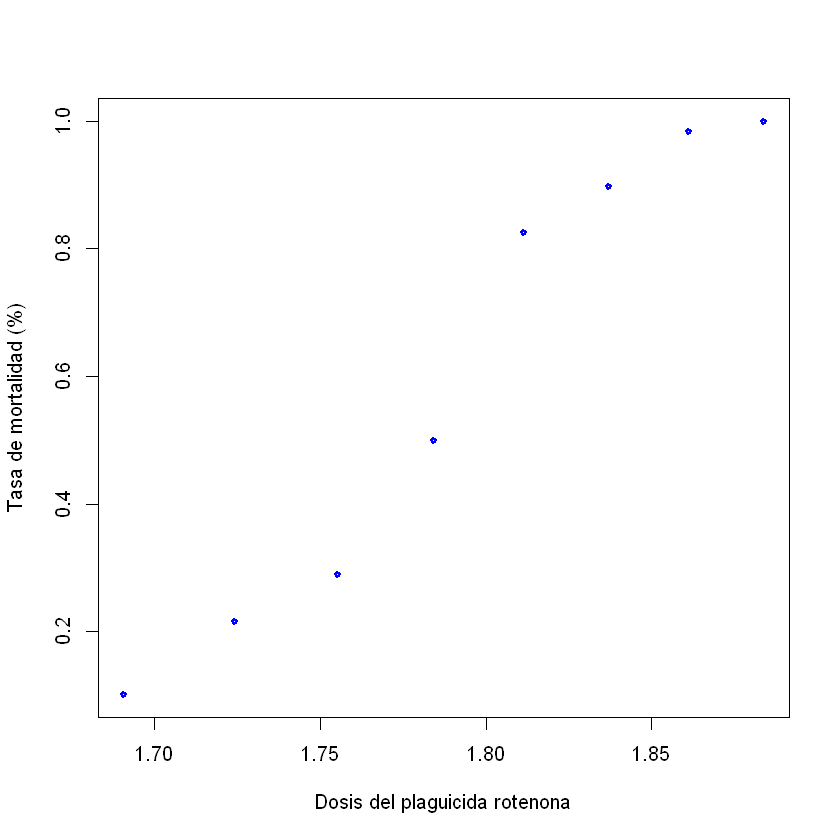

In [9]:
###################### Gráfica ejemplo escarabajos funcion de en lace logit ######################
propdied <- (beetles$died)/(beetles$n)
plot(beetles$dose,propdied,xlim=range(beetles$dose),ylim=range(propdied),cex=0.5,lwd=3,
     xlab="Dosis del plaguicida rotenona",ylab="Tasa de mortalidad (%)",col="blue")


In [10]:
###################### de enlace logit, probit y cloglog ######################
dosisg <- seq(min(beetles$dose),max(beetles$dose),length=100)

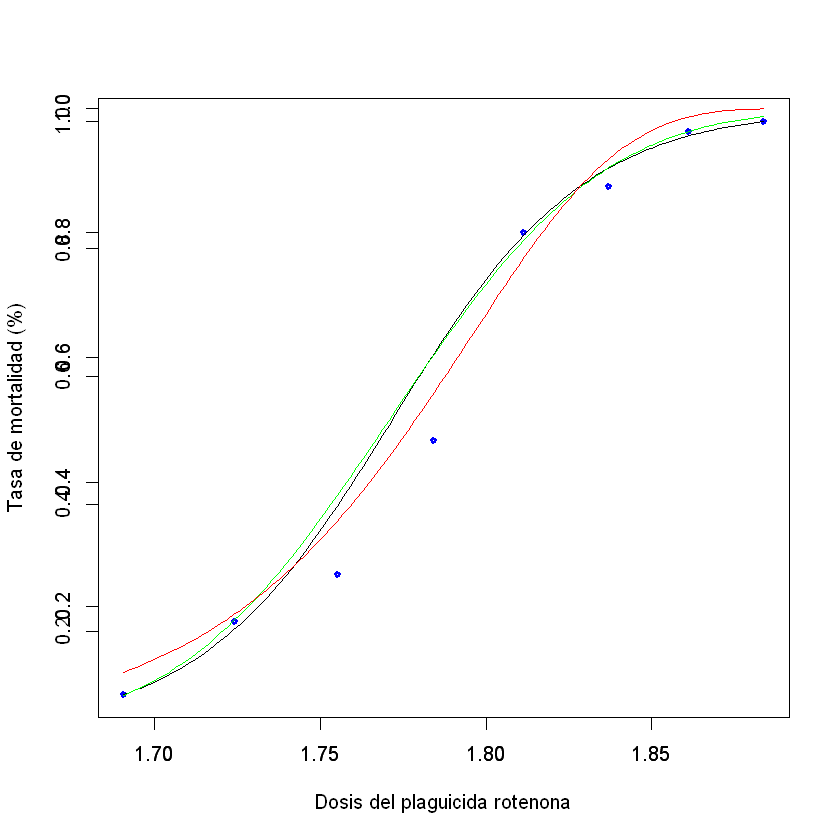

In [11]:
attach(beetles)

plot(dose,died/n,xlim=range(dose),ylim=range(died/n),cex=0.5,lwd=3,
     xlab="Dosis del plaguicida rotenona",ylab="Tasa de mortalidad (%)",col="blue")
par(new=TRUE)
dosisg <- seq(min(dose),max(dose),length=100)
plot(dosisg,predict(fit1,data.frame(dose=dosisg),type="response"),xlim=range(dose),ylim=range(fitted(fit1)),
     col="black",type="l",xlab="",ylab="",main="")
par(new=TRUE)
plot(dosisg,predict(fit2,data.frame(dose=dosisg),type="response"),xlim=range(dose),ylim=range(fitted(fit1)),
     col="green",type="l",xlab="",ylab="",main="")
par(new=TRUE)
plot(dosisg,predict(fit3,data.frame(dose=dosisg),type="response"),xlim=range(dose),ylim=range(fitted(fit1)),
     col="red",type="l",xlab="",ylab="",main="")

  Dada la anterior gráfica la cual proporciona los diferentes modelos, se logra observar que la mejor que se ajusta a los datos está determinada por la curva roja, la cual hace referencia  a la función de enlace **cloglog** como anteriormente se había establecido.

### MODELO FINAL (CON FUNCION DE ENLACE CLOGLOG)

In [12]:
summary(fit3)


Call:
glm(formula = died/n ~ dose, family = binomial("cloglog"), data = beetles, 
    weights = n)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.80329  -0.55135   0.03089   0.38315   1.28883  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -39.572      3.240  -12.21   <2e-16 ***
dose          22.041      1.799   12.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.2024  on 7  degrees of freedom
Residual deviance:   3.4464  on 6  degrees of freedom
AIC: 33.644

Number of Fisher Scoring iterations: 4


---

## Test de Wald


 Ahora para hacer una hipótesis sobre la dosis, considero a $\beta_2$. 

$$H_{0}: \beta_2 = 0 \;\;\;\;\; vs \;\;\;\;\;\; H_{1}: \beta_2 \neq  0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]{-1}(\hat{\beta_2}  - \beta_2^{0})$$


Para hacer inferencia con respecto a los datos se tiene:

* Consideranddo que $Z_{\hat{\beta_2}}=12.25$, se contrasta con la estadistica normal (concluyendose que se rechaza $H_0$, ver significancia de $\beta_2$).

* $ \xi _{W} = 150.04$ que al ser contrastado con una chi cuadrado con un grado de libertad $\chi^2_{1}$ se tiene: $ 150.04=\xi _{W} > \chi^2_{1} $ es decír que a un nivel de significancia aproximado de $100(\alpha)\%$ se rechaza la hiótesis nula. concluyendose que la dosis actua de manera significativa en la proporcion de escarabajos muertos.

* considerando lo anterior $(Z_{\hat{\beta_2}})^2=(12.25)^2 = \xi _{W} = 150.04$ se tiene la misma desición. veamos el calculo de la estadística de Wald y el p-valor:

In [21]:
(coef(fit3)[c(2)])^2 /(vcov(fit3)[c(2), c(2)])     #test de wald

dose 
150.0482

In [22]:
pvalor<- 1-pchisq((12.25)^2,1);pvalor

[1] 0



<div class="alert alert-success">
    <b>Desición:</b>
    
Se rechaza la hipótesis nula $H_{0}: \beta_2 =0$ luego es sigfnificativo, concluyendose que la dosis si está afectando la probabilidad de exito $\mu_k$
</div>

---

## Test de razón de verosimilitudes

Para evaluar si:

$$H_{0}: \beta_2 = 0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq  0 $$

Considerando que el test de verosimilitudes está determinado por: $\xi _{RV}=2[l(\hat{\beta})-l(\hat{\beta^{o}})]$ sumando y restando $\hat{\beta}$ del modelo saturado se obtiene:

$$\xi _{RV}=2[l(\hat{\beta})-l(\hat{\beta^{o}})]=\phi^{-1} [D(y;\hat{\mu}^0)-D(y;\hat{\mu})]  $$

Donde $D(y;\hat{\mu}^0)$ es el desvio del modelo restringido llamado **Null Deviance** y donde $D(y;\hat{\mu})$ es el desvio del modelo sin restricción llamado **Residual Deviance**

**Null Deviance** Es el desvio de un modelo donde todos los betas excepto el intercepto son iguales a cero.


Luego como $\phi=1$ se tiene:

$$\xi _{RV}=Null deviance- Residual Deviance=284.2024 - 3.4464 =280.756$$

<div class="alert alert-success">
    <b>Desición:</b>
    
Luego se rechaza $H_0$ a un nivel de significancia APROXIMADO del $ 100(\alpha)\%$ puesto que $280.75=\xi _{RV}>\chi^2(1) =3.8416$ A firmandose que es significativo en el modelo. 

* Se rechaza igual como se realizó en el test de Wald
</div>






In [27]:
fit3$null.deviance-fit3$deviance

[1] 280.756

<div class="alert alert-danger" role="alert">
    <b>Nota:</b>
    
Recuerde que se compara con una $\chi^2_{(1)}$ con un grado de libertad porque es solo un parámetro. $\chi^2_{(1)}=(Z_{\alpha})^2=(1.96)^2=3.8416$
</div>

#### Calculando $R_{D}^2$

$$R^2_{D}=1-\frac{Deviance mejor modelo}{Deviance peor modelo}=\frac{3.44/6}{284.2/7}$$

    EL Deviance del peor modelo en términos de ajuste es aquel que todos los betas son iguales a cero menos el intercepto

In [98]:
gof_glm(fit3)


  Family:  binomial 
    Link:  cloglog 
                                                    Df   Value
Residual deviance                                    6  3.4464
Pearson's statistic                                  6  3.2947
Adjusted R-squared based on the residual deviance       0.9859
Adjusted R-squared based on the Pearson's statistic     0.9839
-2*log-Likelihood                                      29.6445
AIC                                                    33.6445
BIC                                                    33.8034




In [99]:
Rd<- 1-(fit3$deviance/6)/(fit3$null.deviance/7); Rd

[1] 0.9858522

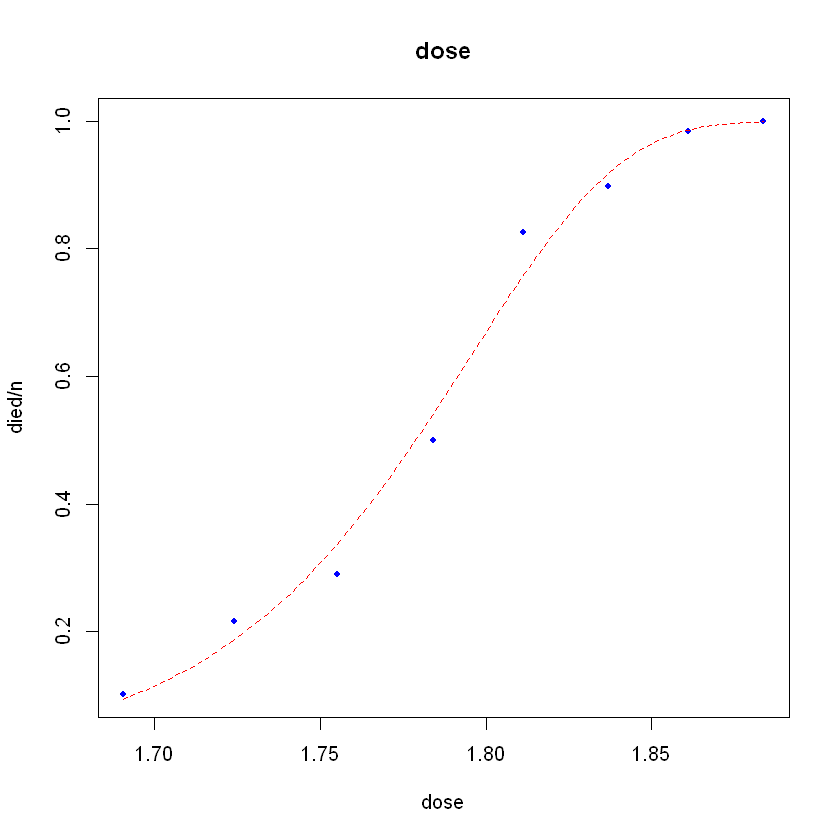

In [84]:
#install.packages("sqldf", "/Users/YULY/anaconda/Lib/R/library")
require(sqldf)
graphs_glm(fit.model =fit3,a=1,b=1,ngroup = 8,col = "blue" )   
#el (a,b)=(2,2) establece cantidad de graficas matriz(1*1), ngroup=8, pch=  ,col=

La anterior gráfica representa el eje x(dosis), el eje y ($\hat{\mu}$ Proporción de escarabajos muertos).



## Análisis de sensibilidad 

La siguiente gráfica es la de los residuos cuantil, mediante la función **residuals_glm()** la cual es generada por defecto.

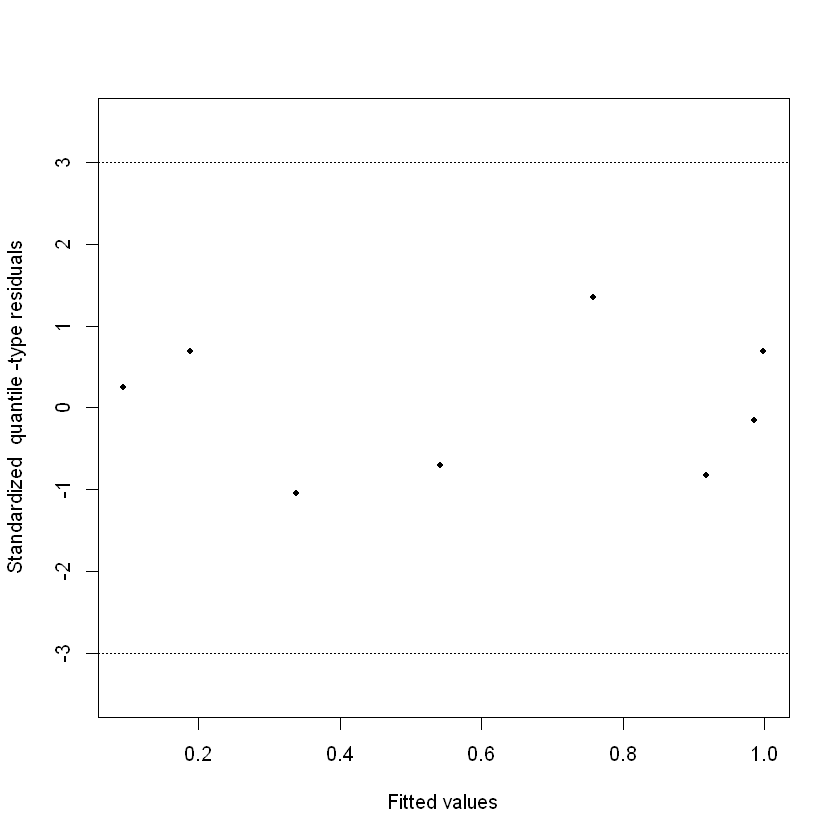

In [92]:
residuals_glm(fit3)   #Por default residuos quantile

Para hacer un contraste con respecto a a los residuos de pearson se tiene:

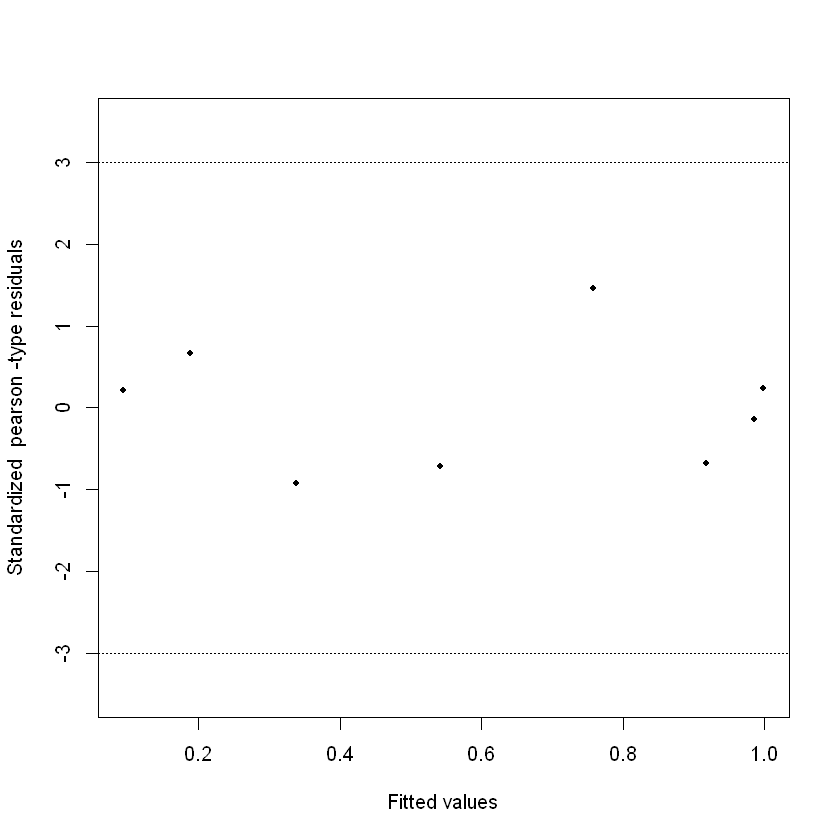

In [93]:
residuals_glm(fit3,type = "pearson")   #Por default residuos quantile

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


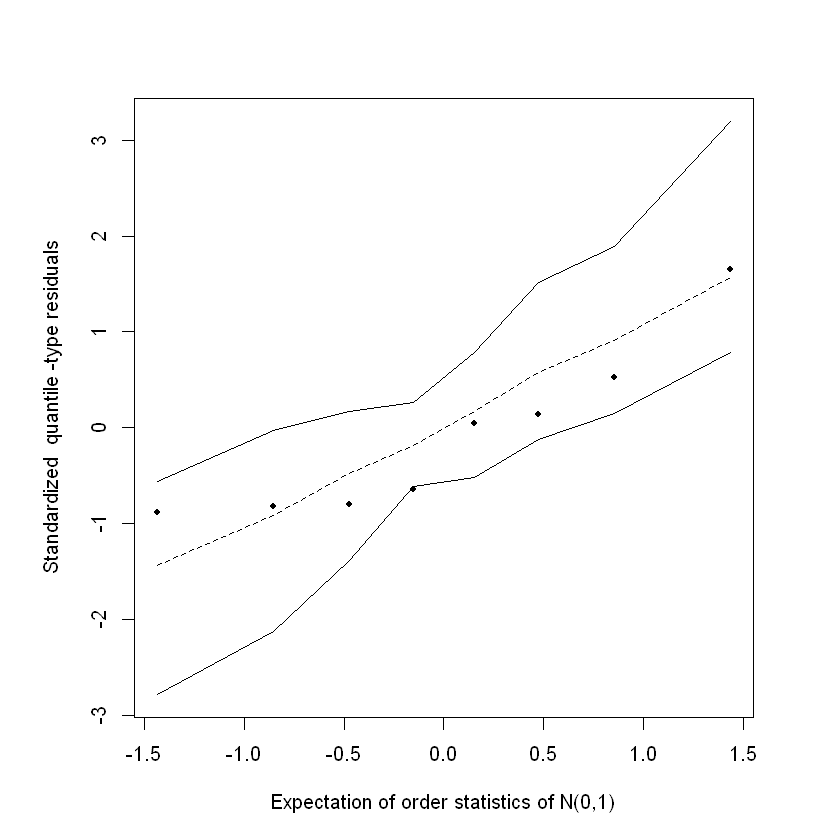

In [94]:
envelope_glm(fit3)

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


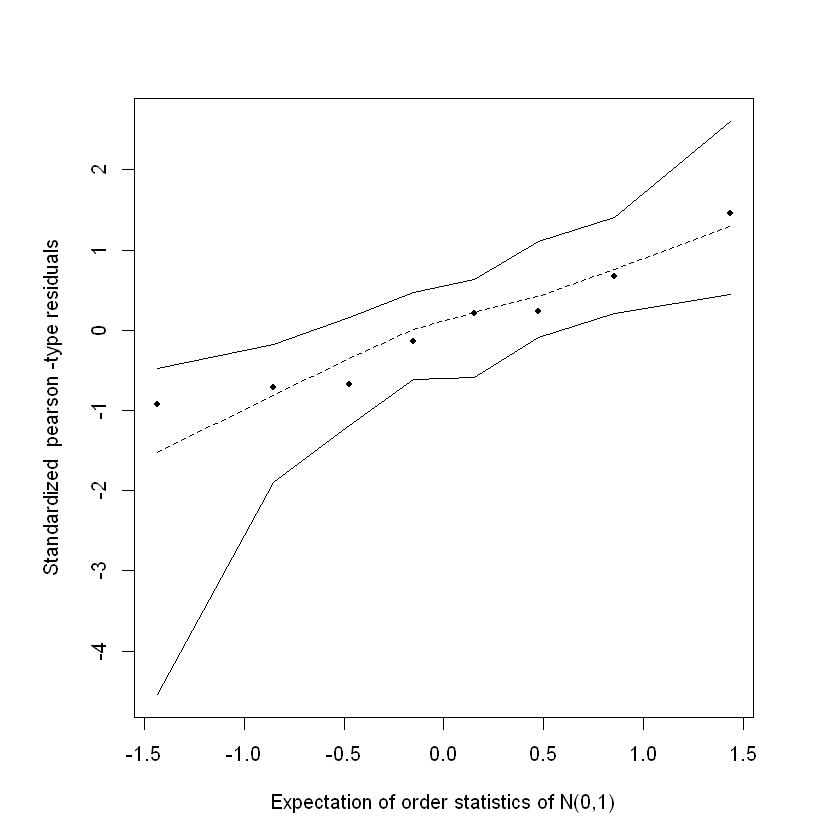

In [95]:
envelope_glm(fit3,type = "pearson")

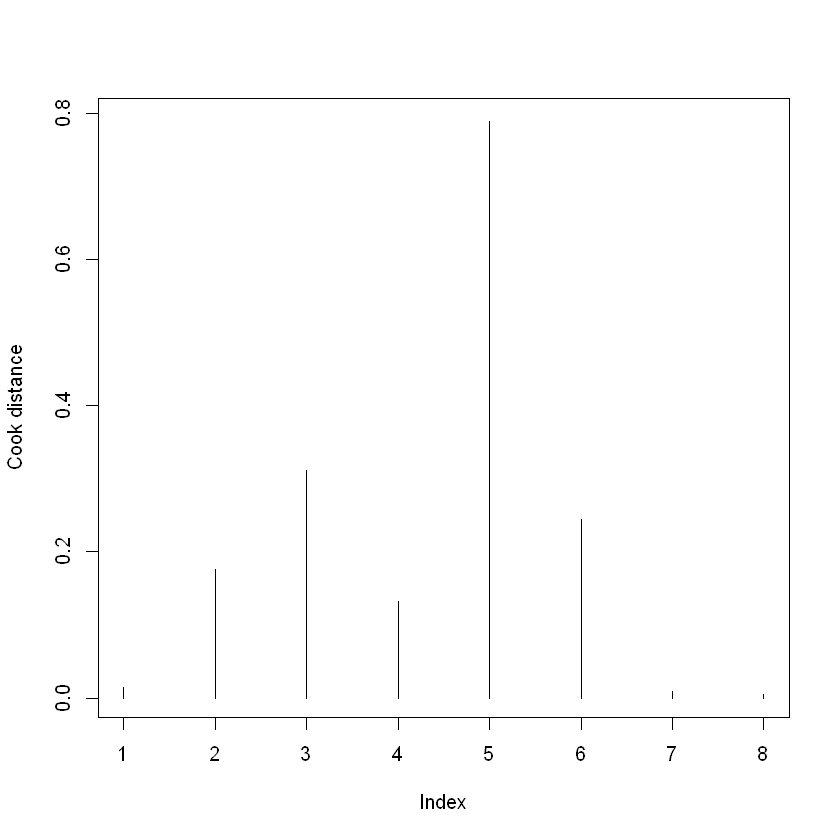

In [96]:
Cookdis_glm(fit3)

In [97]:
case.deletion_glm(fit3,subset = c(-5))


            Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*  Pr(>|z|)*
(Intercept)   -39.572       3.240          0 |   -39.041       3.173          0
dose           22.041       1.799          0 |    21.710       1.761          0
            | Change(%)
(Intercept) |     1.343
dose        |    -1.504

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


La estimación del intercepto aumentó un $3\%$, mientras que la estimación de $\beta_2$ disminuyó $1.5\%$ todo al quitar la observación 5. No obstante la significancia permaneció igual lo cual indica que al quitar el dato 5 las cosas siguen siendo prácticamente iguales.


# Interpretación de los $\beta$ dada la función de enlace Logit


  $\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           n_k Y_k \sim Binomial(n_k, \mu_k)\\
		 g(\mu_k)=\mathbf{x}_k'\beta = \beta_1 + \beta_2 x_{k} \\
		 Y_1,  Y_2, ..., Y_n
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
   
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           n_k Y_k \sim Binomial(n_k, \mu_k)\\
		 log(\frac{\mu_k}{1-\mu_k})=\mathbf{x}_k'\beta = \beta_1 + \beta_2 dose_{k2} \\
		 Y_1,  Y_2, ..., Y_n
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
   

Al tratarse de la función de enlace **logit** donde:

$$log(\frac{\mu_k}{1-\mu_k})= \beta_1 + \beta_2 dose_{k} $$

--- 

Aplicando exponencial se tiene:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 dose_{k} ]}{ exp[ \beta_1 + \beta_2 dose_{k}]} $$


Caso variable continua:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 (X_{0}+\delta)]}{ exp[ \beta_1 + \beta_2 X_{0}]} = exp(\beta_2 \delta) $$
 
Considerando que $\hat{\beta}_2=22.04$, se tiene:

  $$exp(\hat{\beta}_2) = exp(22.04)= 3731215914.79$$
 
* **Interpretación dosis:** Por cada unidad adicional en la dosis, el chance de tener escarabajos muertos aumenta $3731215914\%$.

<div class="alert alert-danger" role="alert">
    <b>Nota:</b>
    
Recuerde que $\delta$ depende de las unidades por ejemplo si se trata de x son cada 10.000 habitantes , $\delta=10000$
</div>

In [24]:
coef(fit3)

(Intercept)        dose 
  -39.57231    22.04117

# REFERENCIAS

Para poder instalar paquetes en jupyter, uso la siguiente linea.

* install.packages("glmx", "/Users/YULY/anaconda/Lib/R/library")